# 1.1 Data Cleaning — R (paso a paso)
# Objetivo:
# - Renombrar variables
# - Remover valores faltantes
# - Crear dummies para variables categóricas
# - Crear variable binaria y: 1 si hay enfermedad cardiaca, 0 caso contrario
# 0) Cargar librerías

In [6]:
install.packages("fastDummies")

Installing package into 'C:/Rlibs'
(as 'lib' is unspecified)

also installing the dependency 'data.table'





  There are binary versions available but the source versions are later:
            binary source needs_compilation
data.table  1.14.8 1.17.8              TRUE
fastDummies  1.6.3  1.7.5             FALSE

  Binaries will be installed
package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ARIANA\AppData\Local\Temp\RtmpiWNP53\downloaded_packages


installing the source package 'fastDummies'




In [8]:
library(dplyr)
library(readr)
library(fastDummies)


# 1) Cargar dataset
# Cambia la ruta al archivo donde guardaste processed.cleveland.data

In [29]:
df <- read_csv("processed.cleveland.data", col_names = FALSE)

Rows: 303 Columns: 14
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [31]:
# Reemplazar "?" por NA
df[df == "?"] <- NA

# Convertir todas las columnas posibles a numéricas
df <- df %>% mutate(across(everything(), ~ suppressWarnings(as.numeric(.))))


# 2) Renombrar columnas

In [33]:
cols_order <- c(
  "age", "sex", "cp", "restbp", "chol", "fbs", "restecg",
  "thalach", "exang", "oldpeak", "slope", "ca", "thal", "hd"
)
colnames(df) <- cols_order

# 3) Reemplazar "?" por NA y convertir a numérico

In [35]:
df[df == "?"] <- NA

# Convierte todas las columnas posibles a numéricas

In [37]:
df <- df %>%
  mutate(across(everything(), ~ suppressWarnings(as.numeric(.))))

# 4) Eliminar filas con NA

In [41]:
library(dplyr)
library(readr)
library(fastDummies)
library(tidyr)   # <- agrega esta línea

# ... resto del código igual ...
df <- df %>% drop_na()


# 5) Definir variables categóricas

In [43]:
cat_cols <- c("sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal")

# 6) Crear variable binaria y

In [45]:
df <- df %>%
  mutate(y = ifelse(hd > 0, 1, 0))

# 7) Crear variables dummy

In [47]:
df_dum <- fastDummies::dummy_cols(df,
                                  select_columns = cat_cols,
                                  remove_selected_columns = TRUE,
                                  remove_first_dummy = TRUE)

# 8) Separar X e y

In [49]:
X <- df_dum %>% select(-hd, -y)
y <- df_dum$y

# 9) Guardar archivos limpios

In [51]:
write_csv(df_dum, "output/heart_clean_with_dummies.csv")
write_csv(X, "output/X_features.csv")
write_csv(data.frame(y = y), "output/y_binary.csv")

# 10) Resumen

In [53]:
cat("Filas finales:", nrow(df_dum), "\n")
cat("Columnas finales:", ncol(df_dum), "\n")
cat("Proporción de y=1:", round(mean(y), 3), "\n")
cat("Primeras columnas de X:\n")
print(head(colnames(X), 10))

Filas finales: 297 
Columnas finales: 22 
Proporción de y=1: 0.461 
Primeras columnas de X:
 [1] "age"     "restbp"  "chol"    "thalach" "oldpeak" "sex_1"   "cp_2"   
 [8] "cp_3"    "cp_4"    "fbs_1"  


In [55]:
str(df)
summary(df)


tibble [297 x 15] (S3: tbl_df/tbl/data.frame)
 $ age    : num [1:297] 63 67 67 37 41 56 62 57 63 53 ...
 $ sex    : num [1:297] 1 1 1 1 0 1 0 0 1 1 ...
 $ cp     : num [1:297] 1 4 4 3 2 2 4 4 4 4 ...
 $ restbp : num [1:297] 145 160 120 130 130 120 140 120 130 140 ...
 $ chol   : num [1:297] 233 286 229 250 204 236 268 354 254 203 ...
 $ fbs    : num [1:297] 1 0 0 0 0 0 0 0 0 1 ...
 $ restecg: num [1:297] 2 2 2 0 2 0 2 0 2 2 ...
 $ thalach: num [1:297] 150 108 129 187 172 178 160 163 147 155 ...
 $ exang  : num [1:297] 0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak: num [1:297] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope  : num [1:297] 3 2 2 3 1 1 3 1 2 3 ...
 $ ca     : num [1:297] 0 3 2 0 0 0 2 0 1 0 ...
 $ thal   : num [1:297] 6 3 7 3 3 3 3 3 7 7 ...
 $ hd     : num [1:297] 0 2 1 0 0 0 3 0 2 1 ...
 $ y      : num [1:297] 0 1 1 0 0 0 1 0 1 1 ...


      age             sex               cp            restbp     
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :3.000   Median :130.0  
 Mean   :54.54   Mean   :0.6768   Mean   :3.158   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :4.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.0  
 Median :243.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :247.4   Mean   :0.1448   Mean   :0.9966   Mean   :149.6  
 3rd Qu.:276.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 M

In [57]:
View(df)

age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3,1
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2,1


# 1.2 Clasification Tree con Validación Cruzada en R
# Continuación directa del bloque 1.1


In [61]:
install.packages("rpart.plot")


Installing package into 'C:/Rlibs'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
           binary source needs_compilation
rpart.plot  3.1.1  3.1.3             FALSE



installing the source package 'rpart.plot'




In [65]:
install.packages("caret")

Installing package into 'C:/Rlibs'
(as 'lib' is unspecified)

also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'future.apply', 'numDeriv', 'progressr', 'SQUAREM', 'diagram', 'lava', 'cli', 'lifecycle', 'rlang', 'tzdb', 'nnet', 'prodlim', 'timechange', 'clock', 'gower', 'hardhat', 'ipred', 'lubridate', 'sparsevctrs', 'timeDate', 'ModelMetrics', 'plyr', 'pROC', 'recipes', 'reshape2'





  There are binary versions available but the source versions are later:
                 binary     source needs_compilation
listenv           0.9.0      0.9.1             FALSE
parallelly       1.35.0     1.45.1              TRUE
future           1.32.0     1.67.0             FALSE
globals          0.16.2     0.18.0             FALSE
future.apply     1.10.0     1.20.0             FALSE
progressr        0.13.0     0.17.0             FALSE
lava            1.7.2.1      1.8.2             FALSE
cli               3.6.1      3.6.5              TRUE
lifecycle         1.0.3      1.0.4             FALSE
rlang             1.1.0      1.1.6              TRUE
tzdb              0.3.0      0.5.0              TRUE
nnet             7.3-18     7.3-20              TRUE
prodlim      2023.03.31 2025.04.28              TRUE
timechange        0.2.0      0.3.0              TRUE
clock             0.6.1      0.7.3              TRUE
gower             1.0.1      1.0.2              TRUE
hardhat           1.3.0  

Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'sparsevctrs'



  These will not be installed
package 'parallelly' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'tzdb' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tzdb'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Rlibs\00LOCK\tzdb\libs\x64\tzdb.dll  a C:\Rlibs\tzdb\libs\x64\tzdb.dll: Permission denied"
Warning message:
"restored 'tzdb'"


package 'nnet' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'timechange' successfully unpacked and MD5 sums checked
package 'clock' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'lubridate' successfully unpacked and MD5 sums checked
package 'ModelMetrics' successfully unpacked and MD5 sums checked
package 'plyr' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ARIANA\AppData\Local\Temp\RtmpiWNP53\downloaded_packages


installing the source packages 'listenv', 'future', 'globals', 'future.apply', 'progressr', 'lava', 'lifecycle', 'hardhat', 'timeDate', 'recipes'


Warning message in install.packages("caret"):
"installation of package 'hardhat' had non-zero exit status"
Warning message in install.packages("caret"):
"installation of package 'future' had non-zero exit status"
Warning message in install.packages("caret"):
"installation of package 'recipes' had non-zero exit status"
Warning message in install.packages("caret"):
"installation of package 'future.apply' had non-zero exit status"
Warning message in install.packages("caret"):
"installation of package 'lava' had non-zero exit status"


In [69]:
install.packages("recipes")
library(caret)

Installing package into 'C:/Rlibs'
(as 'lib' is unspecified)

also installing the dependencies 'hardhat', 'sparsevctrs'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
hardhat  1.3.0  1.4.2             FALSE
recipes  1.0.5  1.3.1             FALSE



Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'sparsevctrs'



  These will not be installed


installing the source packages 'hardhat', 'recipes'


Warning message in install.packages("recipes"):
"installation of package 'hardhat' had non-zero exit status"
Warning message in install.packages("recipes"):
"installation of package 'recipes' had non-zero exit status"


ERROR: Error: package or namespace load failed for 'caret' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called 'recipes'


In [75]:
library(rpart)
library(rpart.plot)

set.seed(123)


# Si no tienes objetos listos:
# df_dum <- read.csv("output/heart_clean_with_dummies.csv")
# y <- df_dum$y
# X <- subset(df_dum, select = -c(hd, y))

In [77]:
y <- df_dum$y
X <- subset(df_dum, select = -c(hd, y))
data <- cbind(X, y = y)

# -------- 1) Split 70/30 estratificado 

In [83]:
idx1 <- which(data$y == 1)
idx0 <- which(data$y == 0)
tr1 <- sample(idx1, floor(0.7 * length(idx1)))
tr0 <- sample(idx0, floor(0.7 * length(idx0)))
train_idx <- c(tr1, tr0)
test_idx  <- setdiff(seq_len(nrow(data)), train_idx)

train <- data[train_idx, , drop = FALSE]
test  <- data[test_idx,  , drop = FALSE]

# Árbol base sin pruning

In [86]:
tree_base <- rpart(
  y ~ .,
  data = train,
  method = "class",
  control = rpart.control(cp = 0)  # crecer al máximo y ver sobreajuste
)

# Plot árbol base

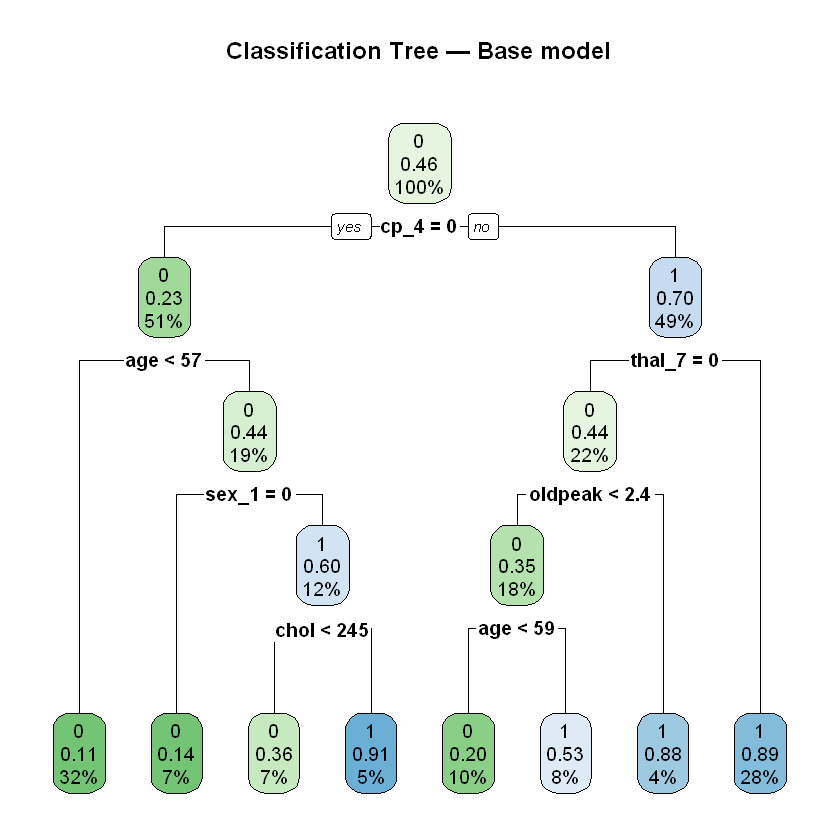

In [89]:
rpart.plot(
  tree_base, main = "Classification Tree — Base model",
  extra = 106, type = 2, box.palette = "GnBu"
)

# Matriz de confusión base

In [92]:
pred_base <- predict(tree_base, newdata = test, type = "class")
cm_base <- table(Predicted = pred_base, Actual = as.factor(test$y))
print(cm_base)
acc_base <- sum(diag(cm_base)) / sum(cm_base)
cat(sprintf("[BASE] Accuracy: %.3f\n", acc_base))


         Actual
Predicted  0  1
        0 44 13
        1  4 29
[BASE] Accuracy: 0.811


# -------- 2) CV 4-fold manual en 50 α (cp)

In [95]:
alpha_grid <- exp(seq(-10, log(0.05), length.out = 50))


# construir folds estratificados

In [98]:
K <- 4
folds <- vector("list", K)


# barajar dentro de cada clase

In [100]:
set.seed(123)
sh1 <- sample(idx1[idx1 %in% train_idx])
sh0 <- sample(idx0[idx0 %in% train_idx])

# repartir en K folds

In [106]:
# Parámetros
K <- 4
set.seed(123)

# Folds estratificados sobre el CONJUNTO DE ENTRENAMIENTO (train_idx ya definido)
folds <- vector("list", K)

# Barajar índices por clase dentro del conjunto de entrenamiento
sh1 <- sample(train_idx[data$y[train_idx] == 1])
sh0 <- sample(train_idx[data$y[train_idx] == 0])

# Función para partir en K bloques casi iguales
split_vec <- function(v, K) split(v, cut(seq_along(v), K, labels = FALSE))

folds1 <- split_vec(sh1, K)
folds0 <- split_vec(sh0, K)

for (k in seq_len(K)) {
  folds[[k]] <- c(folds1[[k]], folds0[[k]])
}

# Grid de α (cp)
alpha_grid <- exp(seq(-10, log(0.05), length.out = 50))

cv_acc <- numeric(length(alpha_grid))

for (a in seq_along(alpha_grid)) {
  cp_val <- alpha_grid[a]
  acc_k <- numeric(K)

  for (k in seq_len(K)) {
    val_idx <- folds[[k]]
    tr_idx  <- setdiff(train_idx, val_idx)

    tr <- data[tr_idx, , drop = FALSE]
    va <- data[val_idx, , drop = FALSE]

    # Entrenar árbol completo y podar con cp específico
    tree_full <- rpart(
      y ~ ., data = tr, method = "class",
      control = rpart.control(cp = 0)
    )
    tree_k <- prune(tree_full, cp = cp_val)

    pr_va <- predict(tree_k, newdata = va, type = "class")
    cm_va <- table(Predicted = pr_va, Actual = as.factor(va$y))
    acc_k[k] <- sum(diag(cm_va)) / sum(cm_va)
  }

  cv_acc[a] <- mean(acc_k, na.rm = TRUE)
}

# Resultado de CV
best_alpha <- alpha_grid[which.max(cv_acc)]
cat(sprintf("[CV] Best α (cp): %.6g | CV Acc: %.3f\n",
            best_alpha, max(cv_acc, na.rm = TRUE)))


[CV] Best a (cp): 0.0433401 | CV Acc: 0.720


# === CV por α (cp) con los folds ya creados ===

[CV] Best a (cp): 0.0433401 | CV Acc: 0.720


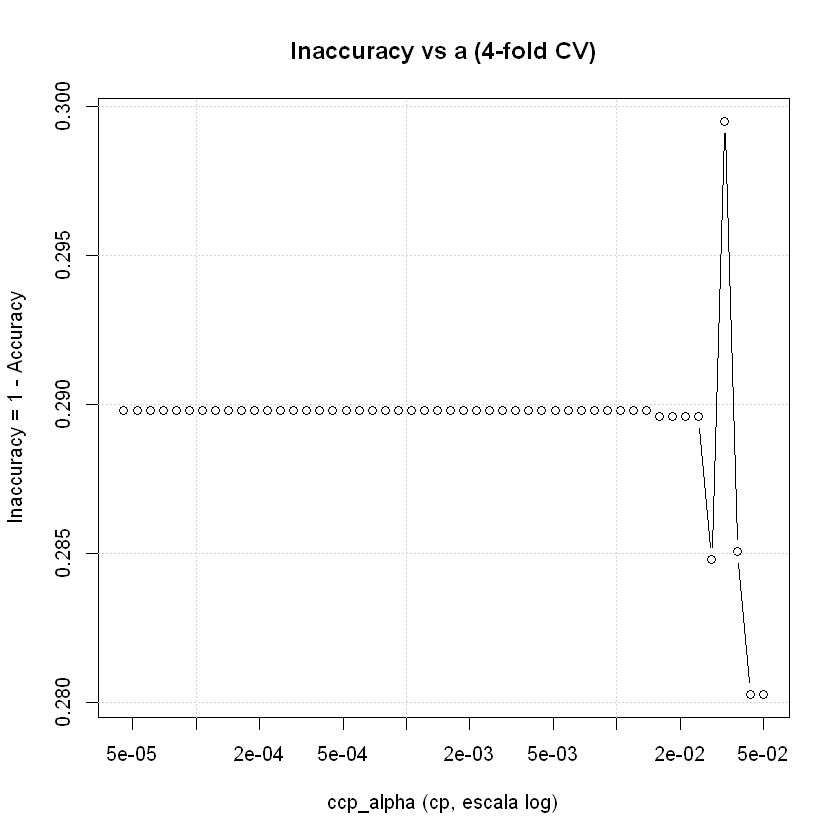

In [113]:
# === CV por α (cp) con los folds ya creados ===
cv_acc <- numeric(length(alpha_grid))

for (a in seq_along(alpha_grid)) {
  cp_val <- alpha_grid[a]
  acc_k <- numeric(length(folds))

  for (k in seq_along(folds)) {
    val_idx <- folds[[k]]
    tr_idx  <- setdiff(train_idx, val_idx)

    tr <- data[tr_idx, , drop = FALSE]
    va <- data[val_idx, , drop = FALSE]

    # Entrenar árbol completo y podar con cp específico
    tree_full <- rpart(
      y ~ ., data = tr, method = "class",
      control = rpart.control(cp = 0)
    )
    tree_k <- prune(tree_full, cp = cp_val)

    pr_va <- predict(tree_k, newdata = va, type = "class")
    cm_va <- table(Predicted = pr_va, Actual = factor(va$y, levels = c(0,1)))
    acc_k[k] <- sum(diag(cm_va)) / sum(cm_va)
  } # <-- Cierre del for interno

  cv_acc[a] <- mean(acc_k, na.rm = TRUE)
} # <-- Cierre del for externo

# Inaccuracy y curva
inacc <- 1 - cv_acc
plot(alpha_grid, inacc, type = "b", log = "x",
     xlab = "ccp_alpha (cp, escala log)",
     ylab = "Inaccuracy = 1 - Accuracy",
     main = "Inaccuracy vs α (4-fold CV)")
grid()

best_alpha <- alpha_grid[which.max(cv_acc)]
cat(sprintf("[CV] Best α (cp): %.6g | CV Acc: %.3f\n",
            best_alpha, max(cv_acc, na.rm = TRUE)))
